In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
stock_symbol = "AAPL"

df = yf.download(
    stock_symbol,
    start="2018-01-01",
    end="2024-01-01"
)

df.head()


/tmp/ipython-input-1601960214.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341885,40.351254,39.639309,39.850084,102223600
2018-01-03,40.334869,40.878196,40.271640,40.405128,118071600
2018-01-04,40.522209,40.625254,40.299728,40.407454,89738400
2018-01-05,40.983574,41.070224,40.526901,40.618235,94640000
2018-01-08,40.831341,41.126421,40.732977,40.831341,82271200


In [4]:
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]

# Target: next day's closing price
df['Next_Close'] = df['Close'].shift(-1)

# Drop last row (NaN target)
df.dropna(inplace=True)

df.head()


Price,Open,High,Low,Volume,Close,Next_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2018-01-02,39.850084,40.351254,39.639309,102223600,40.341885,40.334869
2018-01-03,40.405128,40.878196,40.271640,118071600,40.334869,40.522209
2018-01-04,40.407454,40.625254,40.299728,89738400,40.522209,40.983574
2018-01-05,40.618235,41.070224,40.526901,94640000,40.983574,40.831341
2018-01-08,40.831341,41.126421,40.732977,82271200,40.831341,40.826668


In [5]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False  # IMPORTANT for time-series data
)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)


In [8]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 1.9629648460514442
Mean Squared Error (MSE): 6.890050081629442
Root Mean Squared Error (RMSE): 2.6248904894546445
R² Score: 0.9819283081041073


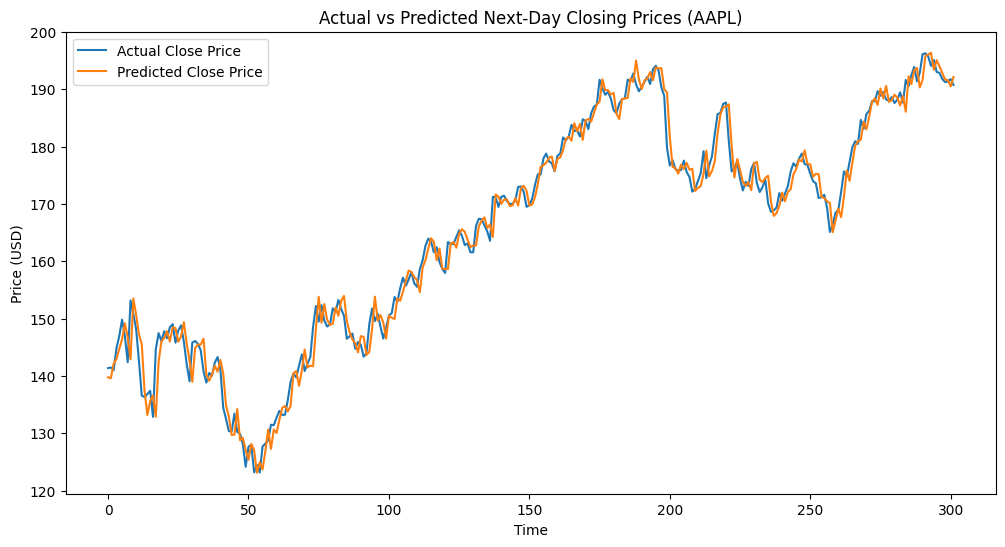

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.title("Actual vs Predicted Next-Day Closing Prices (AAPL)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [10]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

feature_importance


,Feature,Coefficient
2,"(Low, AAPL)",1.005778e+00
0,"(Open, AAPL)",-8.453638e-01
1,"(High, AAPL)",8.414070e-01
3,"(Volume, AAPL)",1.498078e-09
